In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset
dataset = pd.read_csv("advertising.csv")

In [3]:
# DISPLAYING THE DATA SET 
dataset

,Sl.No,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,12.0
3,4,151.5,41.3,58.5,16.5
4,5,180.8,10.8,58.4,17.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,15.6


In [4]:
# TO DISPLAY FIRST FIVE ROWS FROM THE  DATA SET
dataset.head()

,Sl.No,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,12.0
3,4,151.5,41.3,58.5,16.5
4,5,180.8,10.8,58.4,17.9


In [5]:
dataset.shape

(15, 5)

In [6]:
# Data Pre-Processing
dataset.shape

(15, 5)

In [7]:
# 1. Checking for missing values
dataset.isna().sum()

Sl.No        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
# 2. Checking for duplicate rows
dataset.duplicated().any()

False

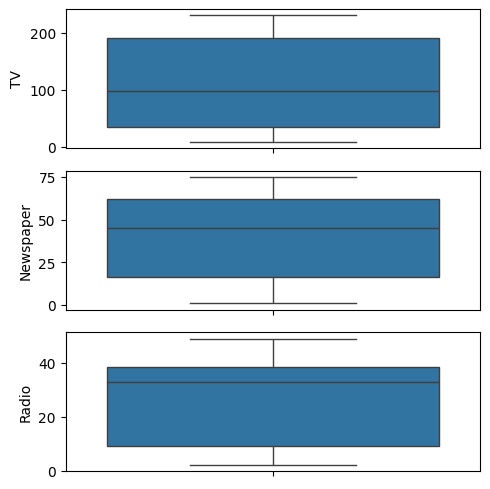

In [9]:
#3. Checking for outliers
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(dataset['TV'], ax = axs[0])
plt2 = sns.boxplot(dataset['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(dataset['Radio'], ax = axs[2])
plt.tight_layout()

C:\Users\Adnan\AppData\Local\Temp\ipykernel_17048\3716476700.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sales']);


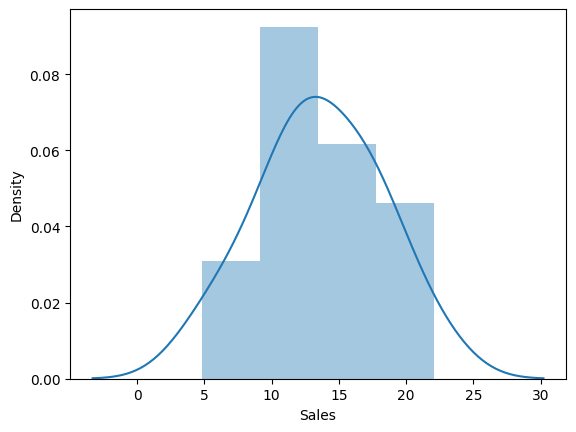

In [10]:
#  Exploratory Data Analysis
# 1. Distribution of the target variable
sns.distplot(dataset['Sales']);

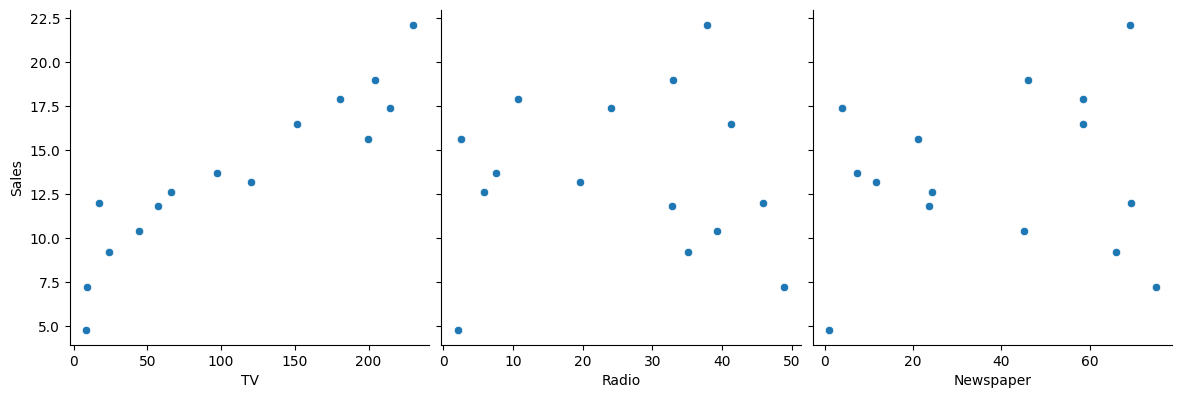

In [11]:
#2. How Sales are related with other variables
sns.pairplot(dataset, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

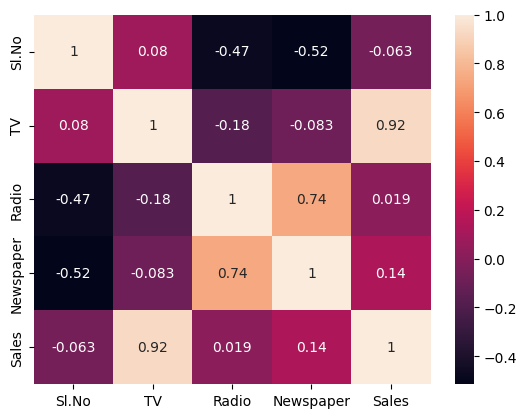

In [12]:
 # 3. Heatmap
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [14]:
#Setting the value for X and Y
x = dataset[['TV']]
y = dataset['Sales']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)

In [16]:
slr= LinearRegression()  
slr.fit(x_train, y_train)

LinearRegression()

In [17]:
#Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  6.563865217540741
Coefficient: [0.05812557]


In [18]:
print('Regression Equation: Sales = 6.948 + 0.054 * TV')

Regression Equation: Sales = 6.948 + 0.054 * TV


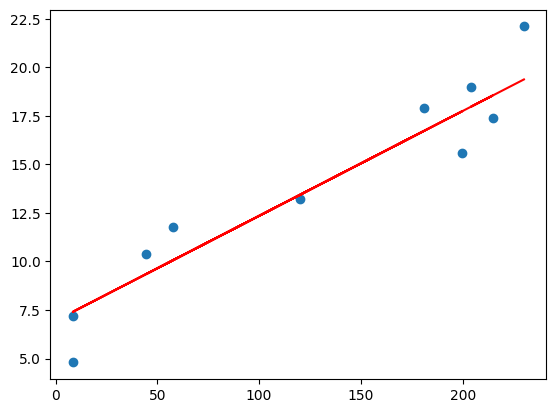

In [19]:
#Line of best fit
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

In [20]:
#Prediction of Test and Training set result  
y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train) 

In [21]:
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [12.23110825  7.94725377 10.40596537 15.36988901  7.56362501]


In [22]:
#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

,Actual value,Predicted value
13,13.7,12.231108
12,9.2,7.947254
10,12.6,10.405965
3,16.5,15.369889
2,12.0,7.563625


In [23]:
#Predict for any value
slr.predict([[100]])

C:\Users\Adnan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.37642218])